###  Setting

In [1]:
MOUNT_PATH = "/run/user/1000/gvfs/smb-share:server=azlab-fs01,share=東研究室/個人work/富井/"

In [2]:
MODEL_PATH = MOUNT_PATH + "PYUSCT_train/dataset008/ml_model/"
model_name = "clf_GPC_rbf_iso"

In [3]:
%ls $MODEL_PATH

clf_GPC_rbf_iso.pkl*              PCA_model_reduced_t100_r128.pickle*
clf_GPC_rbf_iso_t100_r128.pkl*    PCA_model_reduced_t100_r64.pickle*
clf_GPC_rbf_iso_t100_r64.pkl*     PCA_model_reduced_T4_t100_r64.pickle*
clf_GPC_rbf_iso_T4_t100_r64.pkl*  PCA_model_reduced_T8_t100_r64.pickle*
clf_GPC_rbf_iso_T8_t100_r64.pkl*  PCA_model_reduced_time100.pickle*
clf_GPC_rbf_iso_time100.pkl*


### Load model

In [4]:
model_version = "_time100"

In [5]:
from sklearn.externals import joblib

In [6]:
model_clf= joblib.load(MODEL_PATH + model_name + model_version + ".pkl")

In [7]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [8]:
model_clf

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=1, n_restarts_optimizer=0,
             optimizer='fmin_l_bfgs_b', random_state=None,
             warm_start=False)

### Load data

In [9]:
import numpy as np
from os import listdir
from os.path import isfile, join

In [10]:
DATA_PATH = MOUNT_PATH + "PYUSCT_train/dataset008/full_visual" + model_version + "/trial_010/"

In [11]:
files = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]
files.sort()

In [12]:
join(DATA_PATH, files[0])

'/run/user/1000/gvfs/smb-share:server=azlab-fs01,share=東研究室/個人work/富井/PYUSCT_train/dataset008/full_visual_time100/trial_010/part000_size65536.npy'

In [13]:
import time

In [14]:
time.ctime()

'Fri Apr 27 12:45:00 2018'

In [15]:
batch = 65536
count = 0
data = np.zeros(512*512)
data_proba = np.zeros((512*512,2))
for f in files:
    print("{} : turn{} start.".format(time.ctime(), count))
    tmp = np.load(join(DATA_PATH, f))
    data[count*batch:(count+1)*batch] = model_clf.predict(tmp)
    data_proba[count*batch:(count+1)*batch] = model_clf.predict_proba(tmp)
    print("{} : turn{} finished.".format(time.ctime(), count))
    print()
    count += 1
    

Fri Apr 27 12:45:01 2018 : turn0 start.
Fri Apr 27 20:57:36 2018 : turn0 finished.

Fri Apr 27 20:57:36 2018 : turn1 start.
Sat Apr 28 04:31:43 2018 : turn1 finished.

Sat Apr 28 04:31:43 2018 : turn2 start.
Sat Apr 28 12:02:36 2018 : turn2 finished.

Sat Apr 28 12:02:36 2018 : turn3 start.
Sat Apr 28 20:30:35 2018 : turn3 finished.



In [16]:
count

4

In [17]:
data.shape

(262144,)

In [18]:
data_visual = data.reshape((512,512))
data_proba_visual = data_proba[:,1].reshape((512, 512))

In [19]:
data_visual.shape

(512, 512)

In [20]:
data_proba_visual.shape

(512, 512)

### Save result

In [21]:
result_path = MOUNT_PATH + "PYUSCT_train/dataset008/full_visual_result/"
np.save(result_path + "res_data_01_visual" + model_version + ".npy", data_visual)
np.save(result_path + "res_data_proba_visual" + model_version + ".npy", data_proba_visual)

### Load saved data

In [ ]:
import numpy as np

In [ ]:
data_visual = np.load(DATA_PATH + "res_data_01_visual.npy")[256:768,256:768]
data_proba_visual = np.load(DATA_PATH + "res_data_proba_visual.npy")[256:768,256:768]

In [ ]:
data_visual.shape

### Show image

In [22]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

% matplotlib inline

# mpl.style.use('classic')

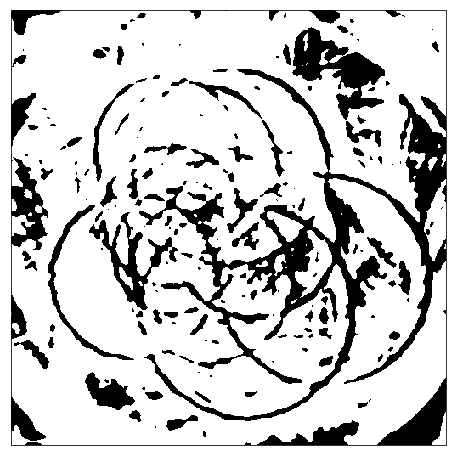

In [23]:
plt.figure(figsize=(8, 8))
# plt.suptitle(title, size=16)
plt.imshow(data_visual, 
            cmap=plt.cm.Greys,
            #vmin=-vmax, vmax=vmax
          )
plt.xticks([])
plt.yticks([])
plt.show()

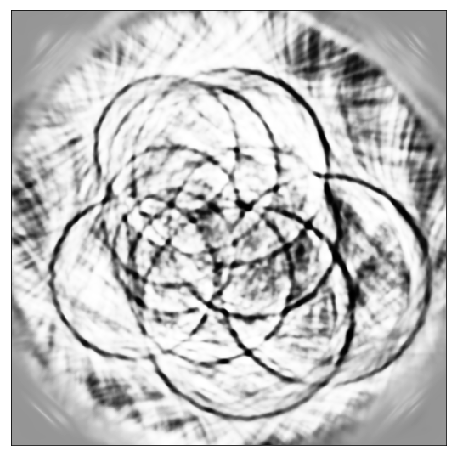

In [24]:
plt.figure(figsize=(8, 8))
# plt.suptitle(title, size=16)
plt.imshow(data_proba_visual, 
            cmap=plt.cm.Greys,
            #vmin=-vmax, vmax=vmax
          )
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
%cd ~/Documents

import matplotlib.image as mpimg

In [ ]:
plt.figure(figsize=(8, 8))
img=mpimg.imread('edge.png')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()